In [2]:
# Imports 
import seaborn as sns
import pandas as pd

# Load the penguin dataset
penguin_df = sns.load_dataset('penguins')

penguin_df = penguin_df[penguin_df['species']!='Chinstrap']

penguin_df['species'] = penguin_df['species'].replace('Adelie',1)
penguin_df['species'] = penguin_df['species'].replace('Gentoo',0)

# Display the 5 first iris
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,1,Torgersen,40.3,18.0,195.0,3250.0,Female
4,1,Torgersen,36.7,19.3,193.0,3450.0,Female
5,1,Torgersen,39.3,20.6,190.0,3650.0,Male


# Preprocessing

In [3]:
# Define your X and Y

y = penguin_df['species']
X = penguin_df.drop(columns=['species'])
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


## Missing values

In [5]:
X.isnull().sum()

island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Duplicates

In [7]:
X.duplicated().sum()

0

## Encoding

In [9]:
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [11]:
X['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
X['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,
                        drop='if_binary',
                       handle_unknown='ignore')

encoder.fit(X[['island','sex']])

encoder.transform(X[['island','sex']])#.toarray()


/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.]])

In [21]:
encoder.get_feature_names_out()

array(['island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_Male'],
      dtype=object)

In [24]:
X[encoder.get_feature_names_out()] = encoder.transform(X[['island','sex']])

X.drop(columns=['island','sex'], inplace=True)

In [25]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0.0,0.0,1.0,1.0
1,39.5,17.4,186.0,3800.0,0.0,0.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,0.0,0.0,1.0,0.0
4,36.7,19.3,193.0,3450.0,0.0,0.0,1.0,0.0
5,39.3,20.6,190.0,3650.0,0.0,0.0,1.0,1.0


## Scale

In [ ]:
# Standard scale --> recenters around 0 using mean and standard deviation
# Robust Scale --> recenters around 0 using median and IQR, good by default for most cases

# Minmax Scale --> squishes between 0 and 1, more efficient for distance based algorithms like KNN

In [26]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(X)

scaler.transform(X)

array([[-0.35365854,  0.48571429, -0.68      , ...,  0.        ,
         1.        ,  0.        ],
       [-0.30487805,  0.11428571, -0.48      , ...,  0.        ,
         1.        , -1.        ],
       [-0.20731707,  0.28571429, -0.12      , ...,  0.        ,
         1.        , -1.        ],
       ...,
       [ 1.02439024, -0.37142857,  0.96      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3902439 , -0.62857143,  0.56      , ...,  0.        ,
         0.        , -1.        ],
       [ 0.96341463, -0.25714286,  0.6       , ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
X = scaler.transform(X)

In [29]:
X = pd.DataFrame(scaler.transform(X), columns = scaler.get_feature_names_out())

X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Male
0,-5.751839,-6.205248,-8.237888,-3.073623,-3.0,0.0,1.0,-2.0
1,-5.751114,-6.235569,-8.237568,-3.073623,-3.0,0.0,1.0,-3.0
2,-5.749663,-6.221574,-8.236992,-3.073623,-3.0,0.0,1.0,-3.0
3,-5.756192,-6.191254,-8.237120,-3.073623,-3.0,0.0,1.0,-3.0
4,-5.751476,-6.160933,-8.237312,-3.073623,-3.0,0.0,1.0,-2.0


# Train/ Test split

In [32]:
# Split into train and test

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

len(X_train)

185

# Model training / tuning / evaluation

### Logistic Reg

In [41]:
# Train/evaluate your model on train set using cross validation!!

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)

cv_results = cross_validate(model, 
                            X_train, 
                            y_train, 
                            cv=10,
                           scoring=['accuracy','recall','precision'])

cv_results

{'fit_time': array([0.02114892, 0.01965189, 0.01061988, 0.00928378, 0.01518989,
        0.01049495, 0.01135206, 0.009408  , 0.00999713, 0.00807238]),
 'score_time': array([0.02455091, 0.00711489, 0.0048461 , 0.00632119, 0.00535083,
        0.00523901, 0.00461006, 0.00500393, 0.00464177, 0.00484395]),
 'test_accuracy': array([0.68421053, 0.73684211, 0.94736842, 0.84210526, 0.89473684,
        0.77777778, 0.83333333, 0.72222222, 0.72222222, 0.83333333]),
 'test_recall': array([0.45454545, 0.54545455, 0.90909091, 0.72727273, 0.81818182,
        0.6       , 0.7       , 0.5       , 0.5       , 0.7       ]),
 'test_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [42]:
cv_results['test_recall'].mean() # Out of all the classes 1, how many does the model predict as 1

0.6454545454545454

In [43]:
cv_results['test_precision'].mean() # When your model predicts a class 1, how often is it correct

1.0

In [44]:
cv_results['test_accuracy'].mean() # The ratio of overall correct predictions

0.7994152046783626

### KNN

In [58]:
# Train/evaluate your model on train set using cross validation!!

from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

cv_results = cross_validate(model, 
                            X_train, 
                            y_train, 
                            cv=10,
                           scoring=['accuracy','recall','precision'])

cv_results

{'fit_time': array([0.00348496, 0.00271797, 0.0094769 , 0.00887012, 0.00393271,
        0.00202107, 0.00247598, 0.00197816, 0.00162101, 0.00186706]),
 'score_time': array([0.01037216, 0.01254797, 0.01991701, 0.01303291, 0.00610423,
        0.01551199, 0.00667906, 0.0055151 , 0.00931287, 0.00595284]),
 'test_accuracy': array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.94444444, 1.        ]),
 'test_recall': array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. ]),
 'test_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [56]:
cv_results['test_accuracy'].mean()


0.9944444444444445

In [57]:
cv_results['test_recall'].mean()

0.99

In [48]:
cv_results['test_precision'].mean()

1.0

## Feature selection

### Correlation

<AxesSubplot:>

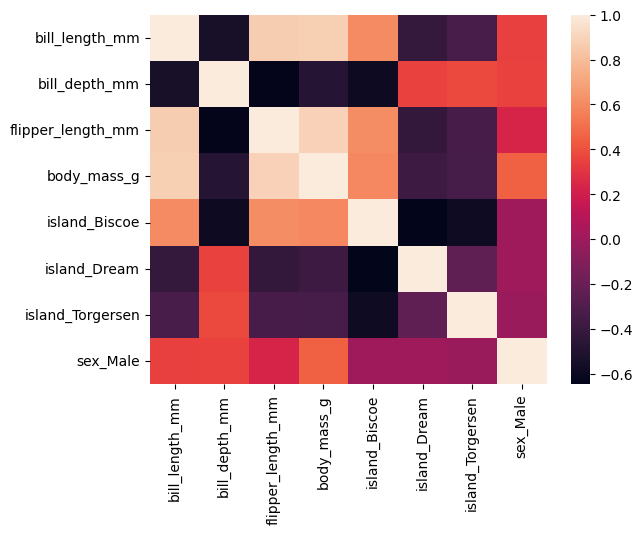

In [59]:
sns.heatmap(X.corr())

In [61]:
corr_df = X.corr().stack().reset_index() # Unstack correlation matrix
corr_df.sort_values(by=0, ascending=False).head(20)

,level_0,level_1,0
0,bill_length_mm,bill_length_mm,1.000000
9,bill_depth_mm,bill_depth_mm,1.000000
54,island_Torgersen,island_Torgersen,1.000000
45,island_Dream,island_Dream,1.000000
36,island_Biscoe,island_Biscoe,1.000000
27,body_mass_g,body_mass_g,1.000000
18,flipper_length_mm,flipper_length_mm,1.000000
63,sex_Male,sex_Male,1.000000
19,flipper_length_mm,body_mass_g,0.884427
26,body_mass_g,flipper_length_mm,0.884427


In [62]:
len(X['flipper_length_mm'].unique())

53

In [63]:
len(X['body_mass_g'].unique())

88

### Feature permutation

In [64]:
import numpy as np
from sklearn.inspection import permutation_importance

model = LogisticRegression(max_iter=10000).fit(X_train, y_train) # Fit model

permutation_score = permutation_importance(model,
                                           X_train, 
                                           y_train, 
                                           n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False, inplace=True, ignore_index=True) # Order by importance
importance_df

,feature,feature importance
0,island_Biscoe,0.08373
1,island_Torgersen,0.042649
2,island_Dream,0.041081
3,bill_length_mm,0.0
4,bill_depth_mm,0.0
5,flipper_length_mm,0.0
6,body_mass_g,0.0
7,sex_Male,0.0


## Model tuning

In [ ]:
# To come ;) 

# Final verification on test set

In [65]:
# If you are happy with your model training, perform a final evaluation on test set

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,y_train)

model.score(X_test,y_test)

1.0

In [66]:
# Train on all data

model.fit(X, y)

KNeighborsClassifier()

# Predict

## Make new point consistent with training points

In [68]:
new_point = penguin_df.iloc[0:1]

new_point.drop(columns=['species'], inplace=True)

new_point

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_15575/1710366214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_point.drop(columns=['species'], inplace=True)


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male


In [69]:
new_point[encoder.get_feature_names_out()] = encoder.transform(new_point[['island','sex']])

new_point

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_15575/475306356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_point[encoder.get_feature_names_out()] = encoder.transform(new_point[['island','sex']])
/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_15575/475306356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_point[encoder.get_feature_names_out()] = encoder.transform(new_point[['island','sex']])
/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_15575/475306356

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,sex_Male
0,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0,0.0,1.0,1.0


In [70]:
new_point.drop(columns=['island','sex'], inplace=True)

/var/folders/4f/r63nbstn2nd7mc5y9jw5c1m40000gn/T/ipykernel_15575/3636556188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_point.drop(columns=['island','sex'], inplace=True)


In [71]:
new_point = scaler.transform(new_point)

new_point

array([[-0.35365854,  0.48571429, -0.68      , -0.39285714, -1.        ,
         0.        ,  1.        ,  0.        ]])

## Predict

In [73]:
# PREDICT!!!!!

model.predict(new_point)

model.predict_proba(new_point)

/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/benjaminauzanneau/.pyenv/versions/3.8.12/envs/lewagon_current/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [74]:
! open .